In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/Tolman-Eichenbaum-Machine


/content/gdrive/My Drive/Tolman-Eichenbaum-Machine


In [ ]:
! ls

 clustering_final.ipynb
 Clustering.ipynb
'Copy of TEM_notebook_social_hierarchy.ipynb'
'Copy of TEM_notebook_square.ipynb'
 g0_auto.pdf
 generalising-structural-knowledge
 Main_TEM_notebook_social_hierarchy.ipynb
 plot_TEM_results
 spud_code
 Summaries
 TEM_Dimensionality_Reduction.ipynb
 TEM_notebook_familytree.ipynb
 TEM_notebook_HEX.ipynb
 TEM_notebook_line_ti.ipynb
 TEM_notebook_loop_laps.ipynb
 TEM_notebook_social_hierarchy.ipynb
 TEM_relation_clustering.ipynb
 TEM_run.ipynb
 torch_tem


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime
import re
from os import listdir
import sys
#sys.path.insert(0, 'model_files/')
sys.path.insert(0, 'generalising-structural-knowledge')
from plotting_functions import *
from arb_functions import *
from helper_functions import *
from behaviour_analyses import *
from environment_functions import *

save_dirs = ['Summaries/']

date = '2021-01-01'
run = '0_social_hierarchy_initial_world_n_action=10'

recent = -1
data, para, list_of_files, save_path = get_data(save_dirs, run, date, recent)

A_RNN, g2g, x_all, g_all, p_all, p_gen_all, acc_s_t_to, acc_s_t_from, positions, shinys, adj, timeseries = data
params, widths, batch_id, g_size, p_size, s_size, s_size_comp, n_freq, width, states = para

mult = 4 if params['world_type'] == 'tonegawa' else 4  # upsample
smoothing = 1
cmap = 'jet'
maxmin=True

import seaborn
seaborn.set_style(style='white')
seaborn.set_style({'axes.spines.bottom': False,'axes.spines.left': False,'axes.spines.right': \
                   False,'axes.spines.top': False})

shinys_, masks, g_lim, p_lim = sort_data(g_all=g_all, p_all=p_all, shinys=shinys, widths=widths, mult=1, smoothing=0, params=params, batch_id=batch_id, \
                                         g_max_0=False, p_max_0=True)

yesSummaries/2021-01-01/run0_social_hierarchy_initial_world_n_action=10/save
21555 11
538875
no p_timeseries


In [ ]:
env0 = 1
env1 = 2

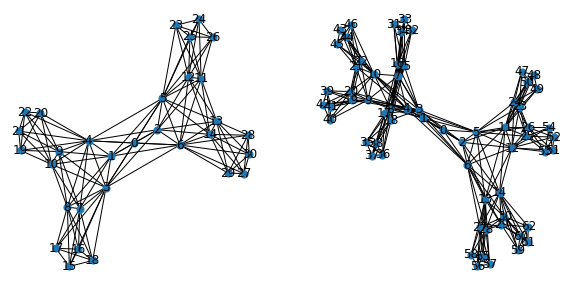

In [ ]:

import matplotlib.pyplot as plt
import networkx as nx
try:
    plt.figure(figsize=(10,5))
    for i, env in enumerate([env0, env1]):
        adj_ = remove_zero_adj(adj[env])
        plt.subplot(1,2,i + 1)
        g = nx.from_numpy_matrix(adj_)
        pos_nodes = nx.spring_layout(g, iterations=500)
        nx.draw(g, pos=pos_nodes, node_size=50, with_labels=True)
    
    plt.show()
except TypeError:
    plt.close('all')
    pass

In [ ]:

for env in range(params['n_envs_save']):
    num_correct = np.sum(acc_s_t_to[env] * positions[env])
    proportion = num_correct / sum(positions[env])
    approx_num = proportion * np.sum(positions[env] > 0.1)
    print(env, '   Approx proportion : ', np.round(proportion, decimals=3), \
          '   Approx num : ', np.round(approx_num, decimals=2))

0    Approx proportion :  0.961    Approx num :  29.78
1    Approx proportion :  0.958    Approx num :  29.7
2    Approx proportion :  0.883    Approx num :  55.6
3    Approx proportion :  0.888    Approx num :  55.92
4    Approx proportion :  0.988    Approx num :  14.82
5    Approx proportion :  0.989    Approx num :  14.83


Explained variance 3 first PCs [0.32803091 0.11180068 0.10653141]


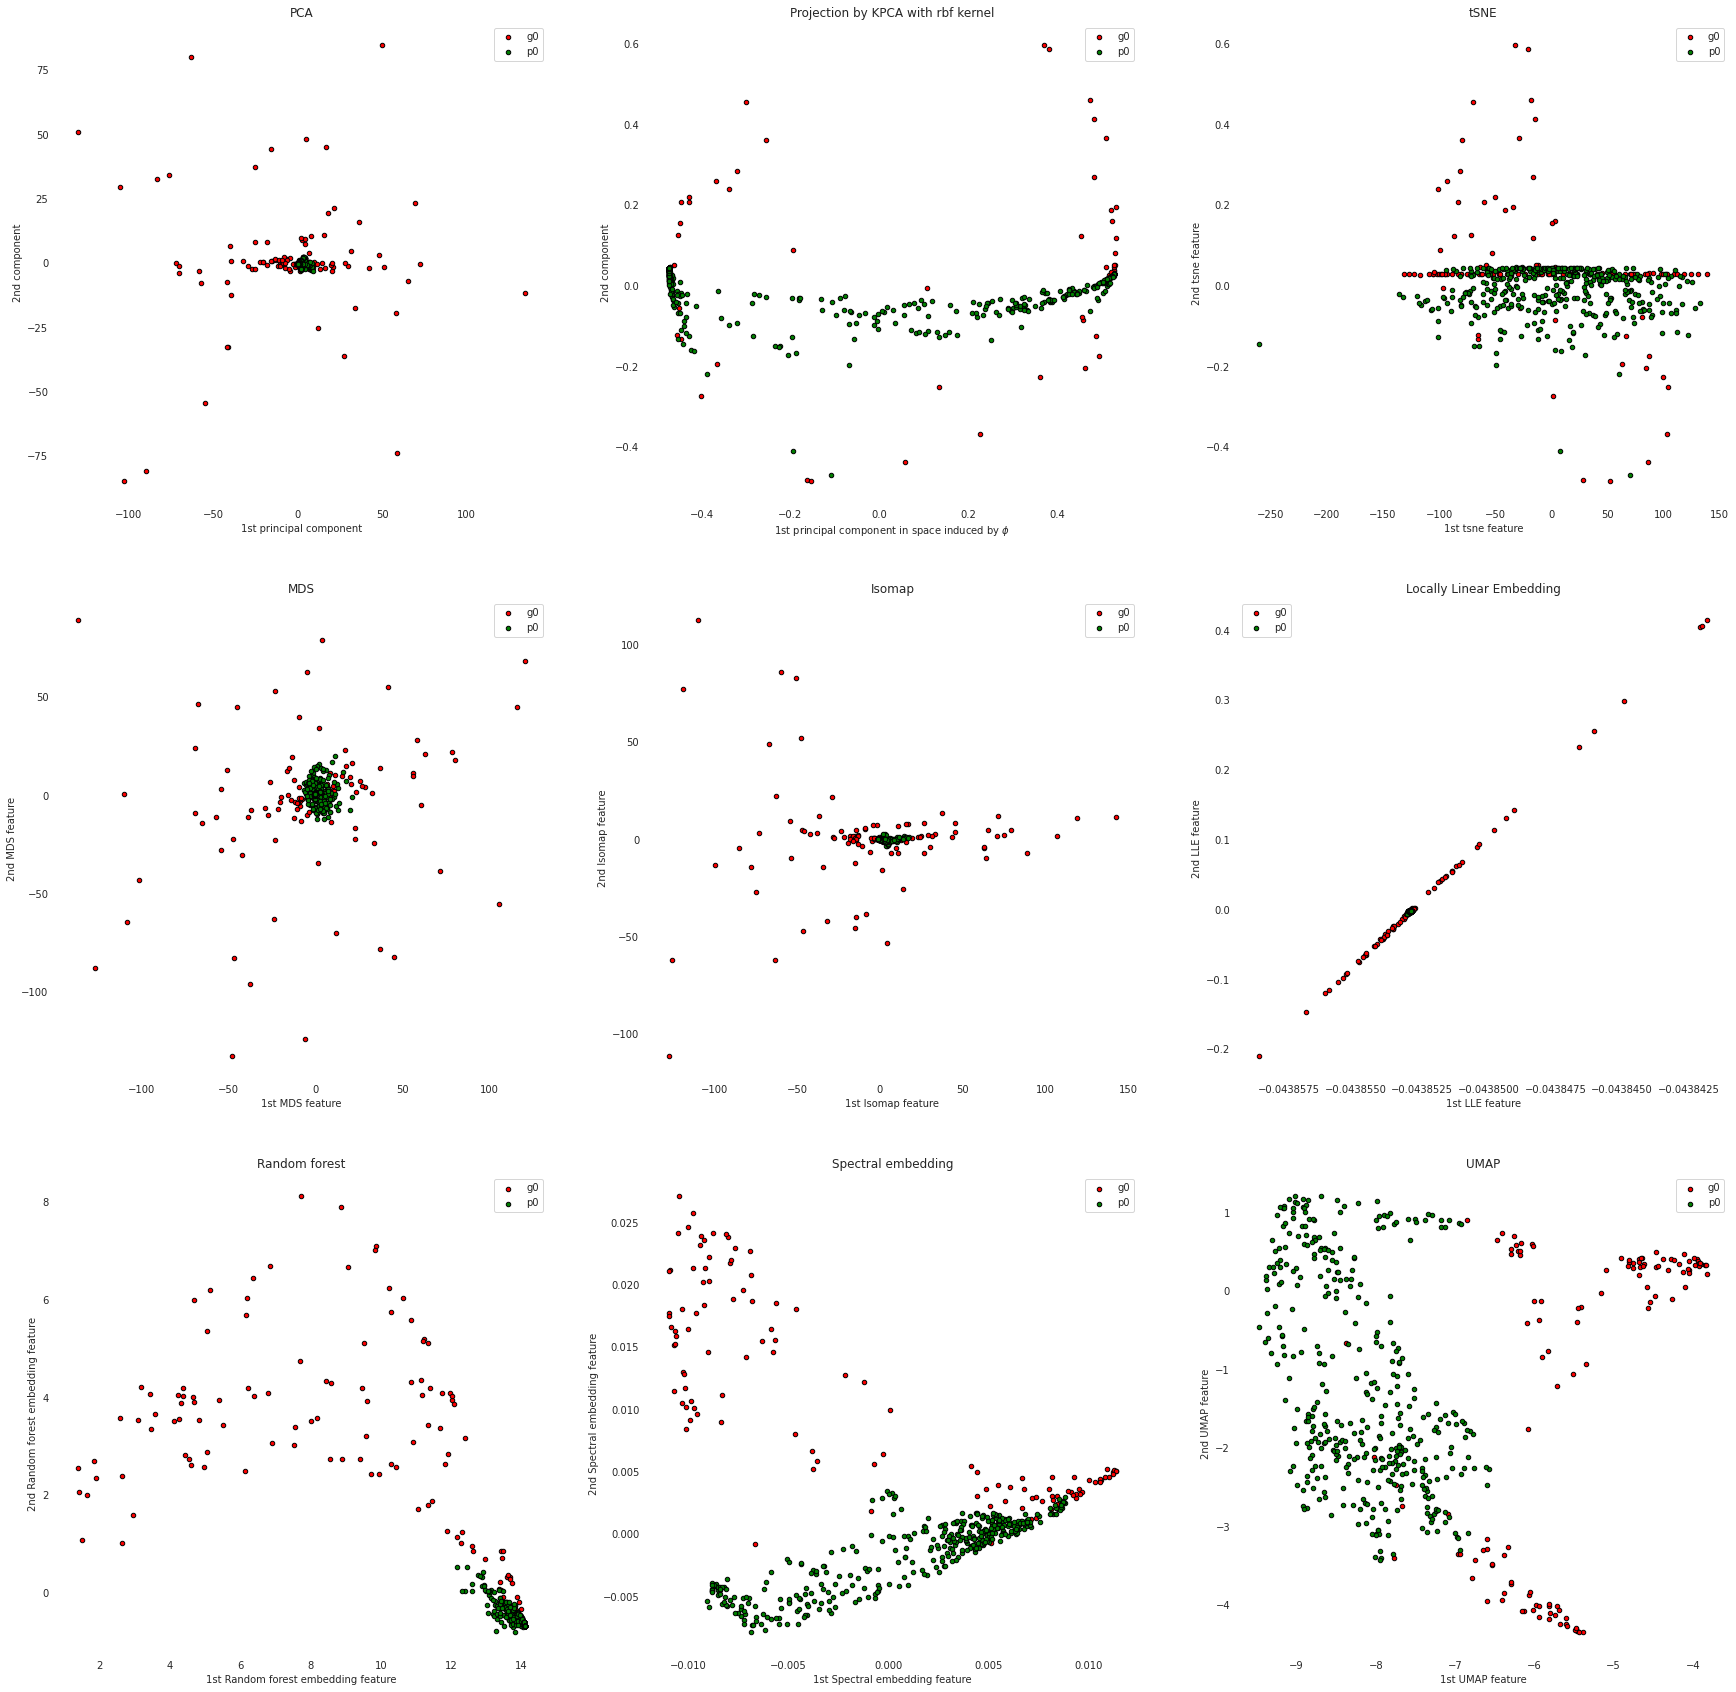

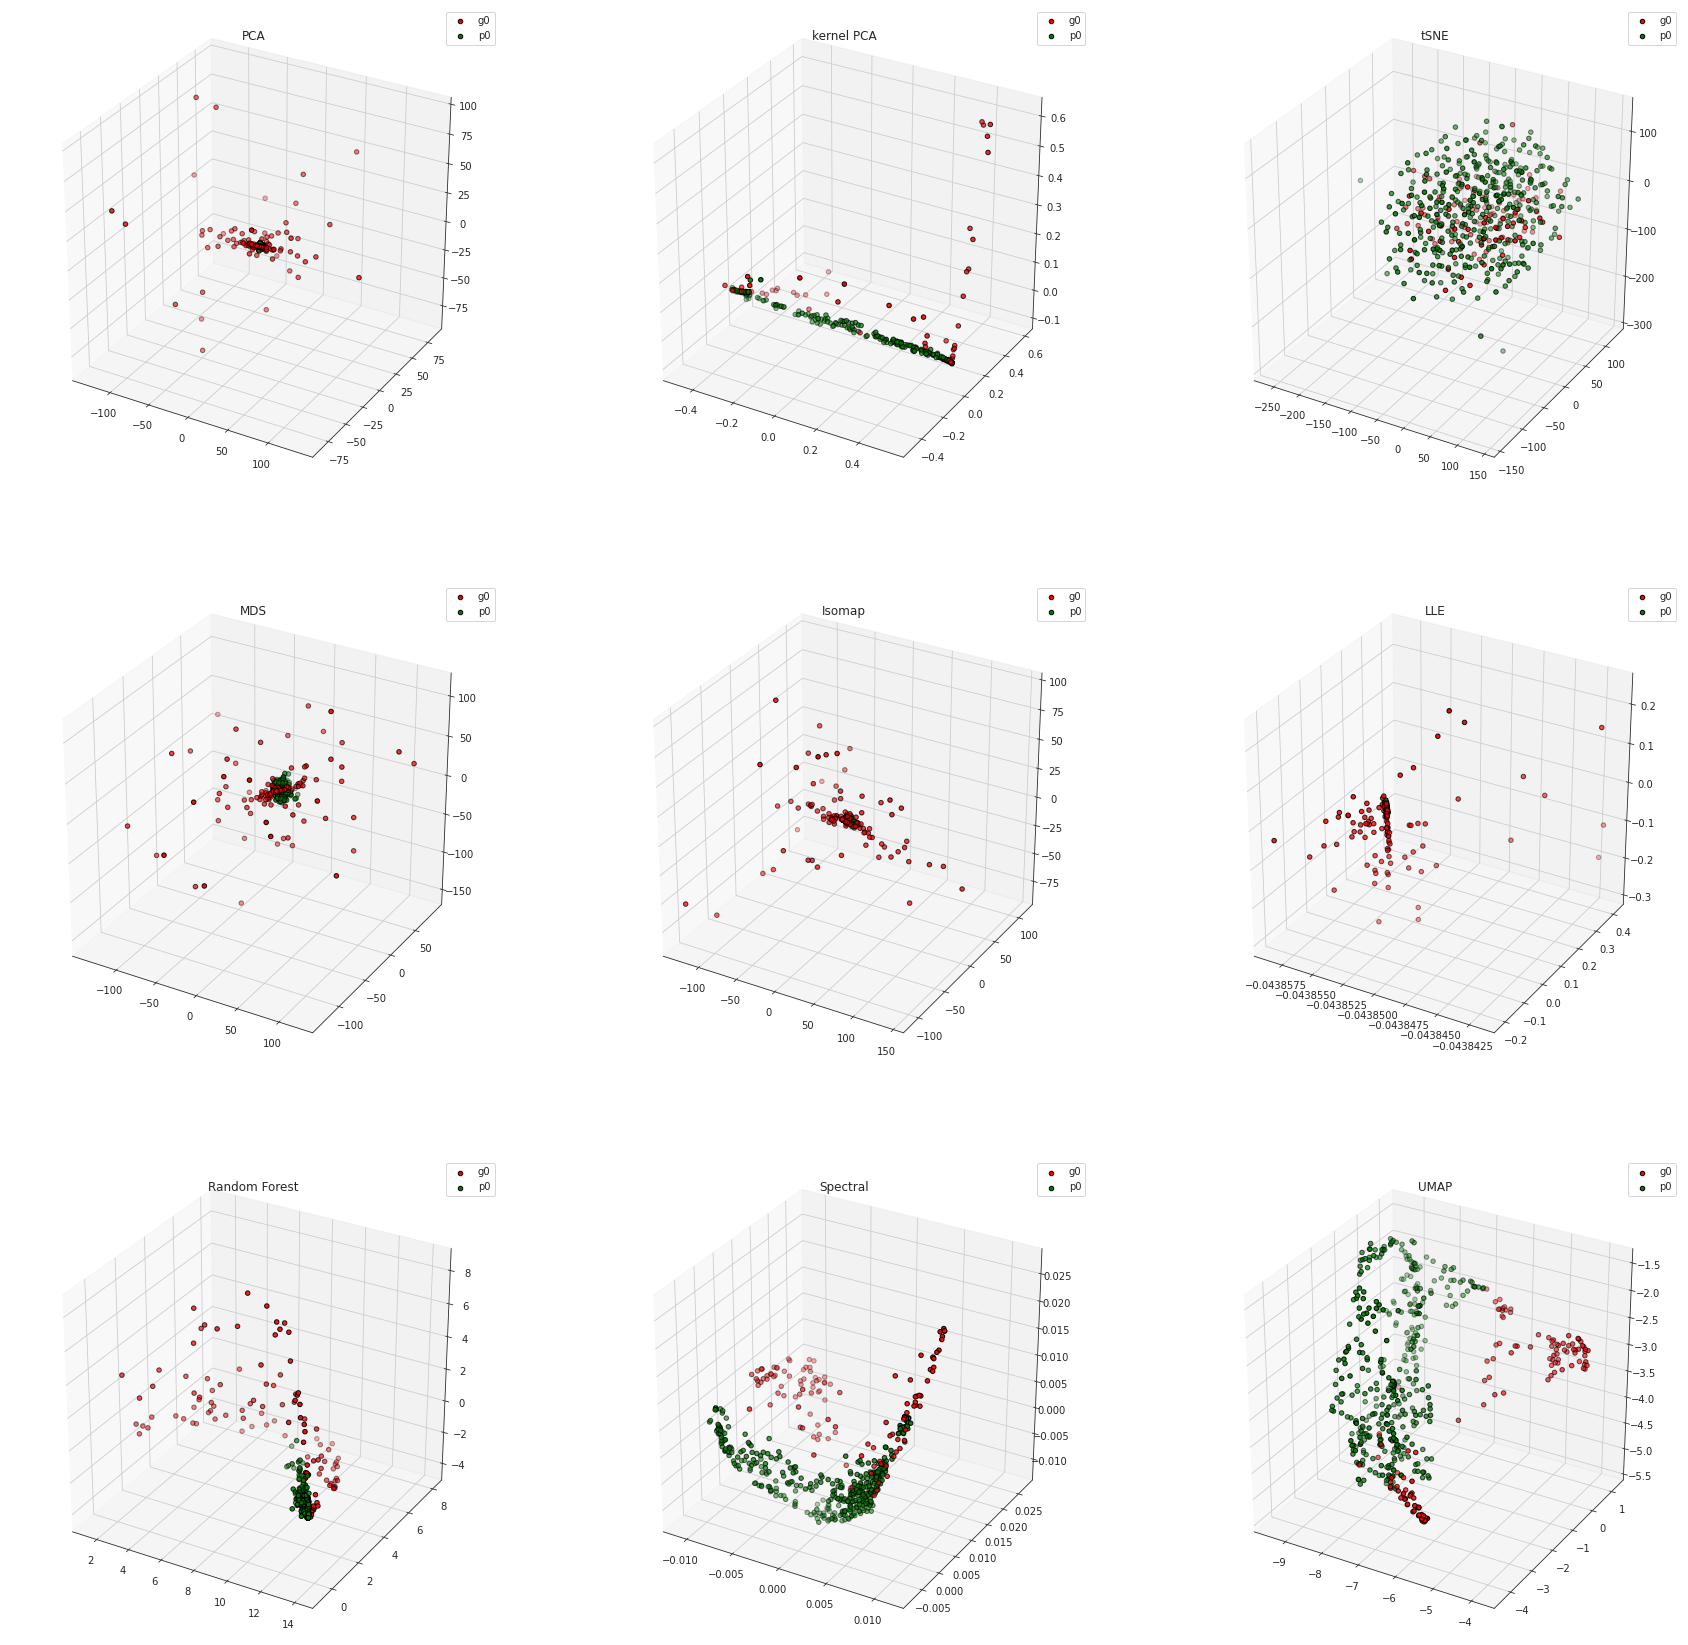

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
import umap

df_g0 = pd.DataFrame(g_all[env0].T)
df_g0["cell_type"] = "g0"
df_p0 = pd.DataFrame(p_all[env0].T)
df_p0["cell_type"] = "p0"

df_g1 = pd.DataFrame(g_all[env1].T)
df_g1["cell_type"] = "g1"
df_p1 = pd.DataFrame(p_all[env1].T)
df_p1["cell_type"] = "p1"

df_g0_p0 = df_g0.append(df_p0)

df_g1_p1 = df_g1.append(df_p1)

df_g0_g1 = df_g0.append(df_g1)

df_p0_p1 = df_p0.append(df_p1)

df_g_p = df_g0_g1.append(df_p0_p1)
df_g_p["cell_type"] = df_g_p["cell_type"].str.get(0)

# 2D Plots
# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

# Variables to change for the plots
######################
name = "g0_p0"
plot_name = "_large_world_n_actions=10"
df = eval("df_"+name)
legend = name.split("_")
######################

variables = list(df.columns[:-1])
x = df.loc[:, variables].values
y = df.loc[:,["cell_type"]].values
X_normalized = StandardScaler().fit_transform(x)


reds = y[:,0] == legend[0]
greens = y[:,0] == legend[1]

rows = 3
cols = 3

fig = plt.figure(figsize=(30,30))
# axs = plt.figure(figsize=(24,24)).subplots(rows,cols)
# Dimensionality reduction techniques

# 1.PCA
pca = PCA()
X_pca = pca.fit_transform(X_normalized)
explained_variance = pca.explained_variance_ratio_
print("Explained variance 3 first PCs",explained_variance[:3])
plt.subplot(rows,cols,1)
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_pca[greens, 0], X_pca[greens, 1], c="green",s=20, edgecolor="k")
plt.title("PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")
plt.legend(legend)
# ----------------------------------------------------------------------

# 2.kernel rbf PCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(x)
plt.subplot(rows,cols,2)
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_kpca[greens, 0], X_kpca[greens, 1], c="green",s=20, edgecolor="k")
plt.title("Projection by KPCA with rbf kernel")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.legend(legend)
# ----------------------------------------------------------------------

# 3.tSNE
X_tsne = TSNE(n_components=3).fit_transform(x)
plt.subplot(rows,cols,3)
plt.scatter(X_tsne[reds, 0], X_kpca[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_tsne[greens, 0], X_kpca[greens, 1], c="green",s=20, edgecolor="k")
plt.title("tSNE")
plt.xlabel("1st tsne feature")
plt.ylabel("2nd tsne feature")
plt.legend(legend)
# ----------------------------------------------------------------------

# 4.MDS
mds = MDS(n_components=3)
X_mds = mds.fit_transform(X_normalized)
plt.subplot(rows,cols,4)
plt.scatter(X_mds[reds, 0], X_mds[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_mds[greens, 0], X_mds[greens, 1], c="green",s=20, edgecolor="k")
plt.title("MDS")
plt.xlabel("1st MDS feature")
plt.ylabel("2nd MDS feature")
plt.legend(legend)

# ----------------------------------------------------------------------
n_neighbors = 30
# 5. Isomap
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=3).fit_transform(X_normalized)
plt.subplot(rows,cols,5)
plt.scatter(X_iso[reds, 0], X_iso[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_iso[greens, 0], X_iso[greens, 1], c="green",s=20, edgecolor="k")
plt.title("Isomap")
plt.xlabel("1st Isomap feature")
plt.ylabel("2nd Isomap feature")
plt.legend(legend)

# ----------------------------------------------------------------------
# 6. LLE
lle = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=3,
                                      method='standard')
X_LLE = lle.fit_transform(X_normalized)
plt.subplot(rows,cols,6)
plt.scatter(X_LLE[reds, 0], X_LLE[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_LLE[greens, 0], X_LLE[greens, 1], c="green",s=20, edgecolor="k")
plt.title("Locally Linear Embedding")
plt.xlabel("1st LLE feature")
plt.ylabel("2nd LLE feature")
plt.legend(legend)
# ----------------------------------------------------------------------
# 7. Random Trees

random_forest = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
X_transformed = random_forest.fit_transform(X_normalized)
pca = decomposition.TruncatedSVD(n_components=3)
X_reduced = pca.fit_transform(X_transformed)
plt.subplot(rows,cols,7)
plt.scatter(X_reduced[reds, 0], X_reduced[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_reduced[greens, 0], X_reduced[greens, 1], c="green",s=20, edgecolor="k")
plt.title("Random forest")
plt.xlabel("1st Random forest embedding feature")
plt.ylabel("2nd Random forest embedding feature")
plt.legend(legend)

# ----------------------------------------------------------------------
# 8. Spectral 
spectral = manifold.SpectralEmbedding(n_components=3, random_state=0,
                                      eigen_solver="arpack")

X_spectral = spectral.fit_transform(X_normalized)
plt.subplot(rows,cols,8)
plt.scatter(X_spectral[reds, 0], X_spectral[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_spectral[greens, 0], X_spectral[greens, 1], c="green",s=20, edgecolor="k")
plt.title("Spectral embedding")
plt.xlabel("1st Spectral embedding feature")
plt.ylabel("2nd Spectral embedding feature")
plt.legend(legend)

# ----------------------------------------------------------------------
# 9. UMAP
umap = umap.UMAP(n_components=3)
X_UMAP = umap.fit_transform(X_normalized)
plt.subplot(rows,cols,9)
plt.scatter(X_UMAP[reds, 0], X_UMAP[reds, 1], c="red",s=20, edgecolor="k")
plt.scatter(X_UMAP[greens, 0], X_UMAP[greens, 1], c="green",s=20, edgecolor="k")
plt.title("UMAP")
plt.xlabel("1st UMAP feature")
plt.ylabel("2nd UMAP feature")
plt.legend(legend)
# ----------------------------------------------------------------------

fig.savefig(name+plot_name+"_2d_viz_dim_reduction.pdf")
plt.show()
# 3D Plots


# ----------------------------------------------------------------------
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(rows, cols, 1, projection='3d')
ax.scatter(X_pca[reds, 0], X_pca[reds, 1],X_pca[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_pca[greens, 0], X_pca[greens, 1], X_pca[greens, 2], c="green",s=20, edgecolor="k")
plt.title("PCA")
ax.legend(legend)

ax = fig.add_subplot(rows, cols, 2, projection='3d')
ax.scatter(X_kpca[reds, 0], X_kpca[reds, 1],X_kpca[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_kpca[greens, 0], X_kpca[greens, 1], X_kpca[greens, 2], c="green",s=20, edgecolor="k")
plt.title("kernel PCA")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 3, projection='3d')
ax.scatter(X_tsne[reds, 0], X_tsne[reds, 1],X_tsne[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_tsne[greens, 0], X_tsne[greens, 1], X_tsne[greens, 2], c="green",s=20, edgecolor="k")
plt.title("tSNE")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 4, projection='3d')
ax.scatter(X_mds[reds, 0], X_mds[reds, 1],X_mds[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_mds[greens, 0], X_mds[greens, 1], X_mds[greens, 2], c="green",s=20, edgecolor="k")
plt.title("MDS")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 5, projection='3d')
ax.scatter(X_iso[reds, 0], X_iso[reds, 1],X_iso[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_iso[greens, 0], X_iso[greens, 1], X_iso[greens, 2], c="green",s=20, edgecolor="k")
plt.title("Isomap")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 6, projection='3d')
ax.scatter(X_LLE[reds, 0], X_LLE[reds, 1],X_LLE[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_LLE[greens, 0], X_LLE[greens, 1], X_LLE[greens, 2], c="green",s=20, edgecolor="k")
plt.title("LLE")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 7, projection='3d')
ax.scatter(X_reduced[reds, 0], X_reduced[reds, 1],X_reduced[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_reduced[greens, 0], X_reduced[greens, 1], X_reduced[greens, 2], c="green",s=20, edgecolor="k")
plt.title("Random Forest")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 8, projection='3d')
ax.scatter(X_spectral[reds, 0], X_spectral[reds, 1],X_spectral[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_spectral[greens, 0], X_spectral[greens, 1], X_spectral[greens, 2], c="green",s=20, edgecolor="k")
plt.title("Spectral")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 9, projection='3d')
ax.scatter(X_UMAP[reds, 0], X_UMAP[reds, 1],X_UMAP[reds, 2], c="red",s=20, edgecolor="k")
ax.scatter(X_UMAP[greens, 0], X_UMAP[greens, 1], X_UMAP[greens, 2], c="green",s=20, edgecolor="k")
plt.title("UMAP")
ax.legend(legend)

fig.savefig(name+plot_name+"_3d_viz_dim_reduction.pdf")

plt.show()

Explained variance 3 first PCs [0.12669711 0.10196596 0.06489928]


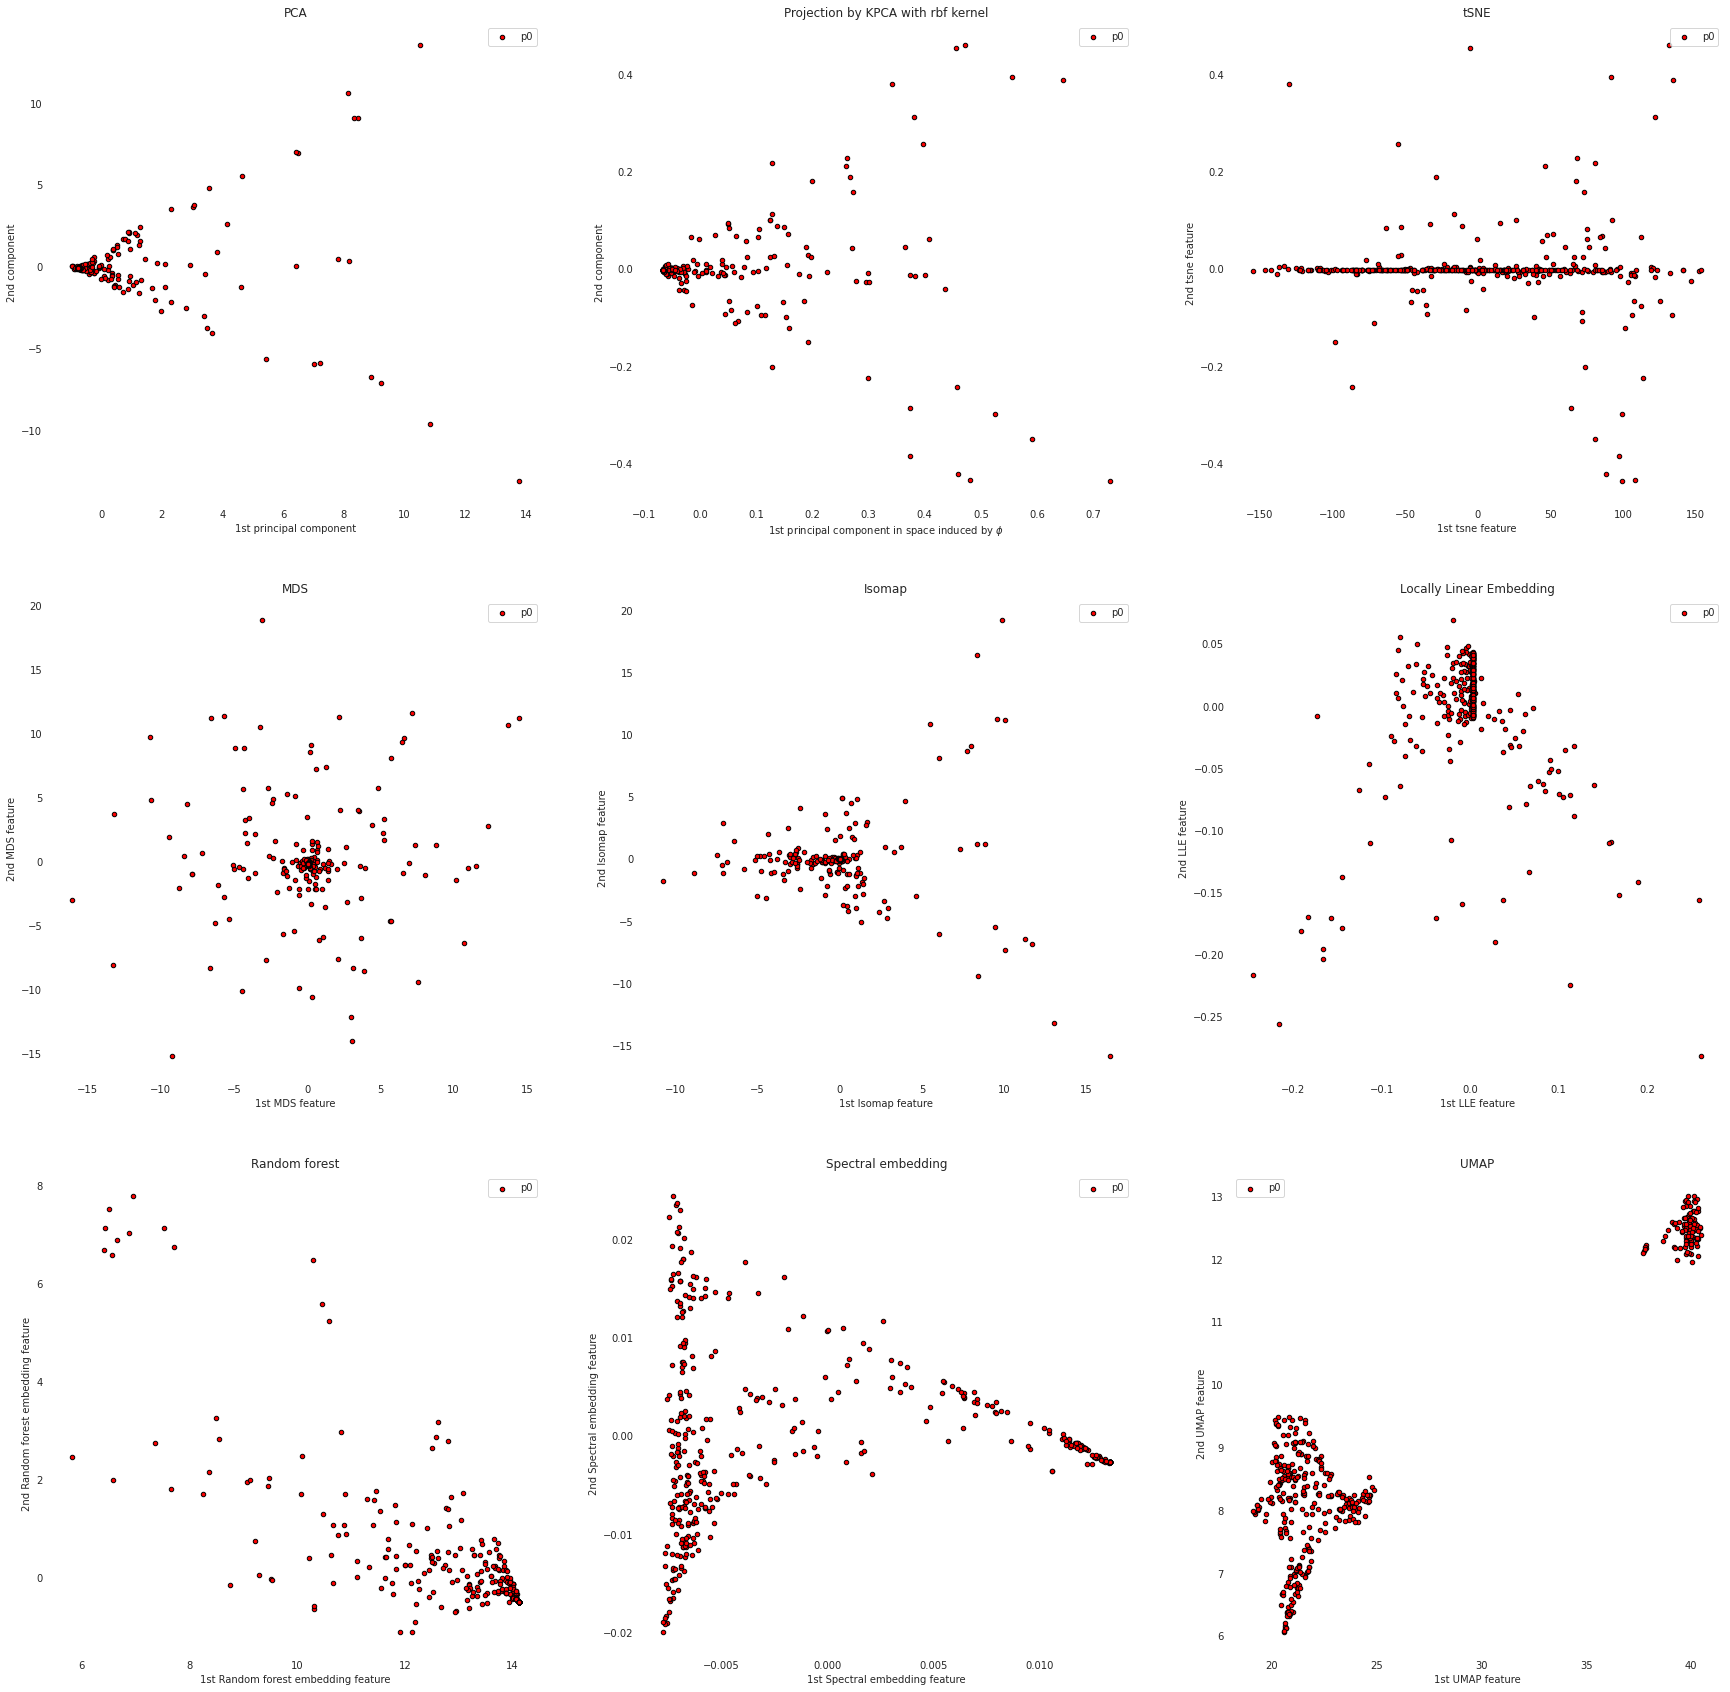

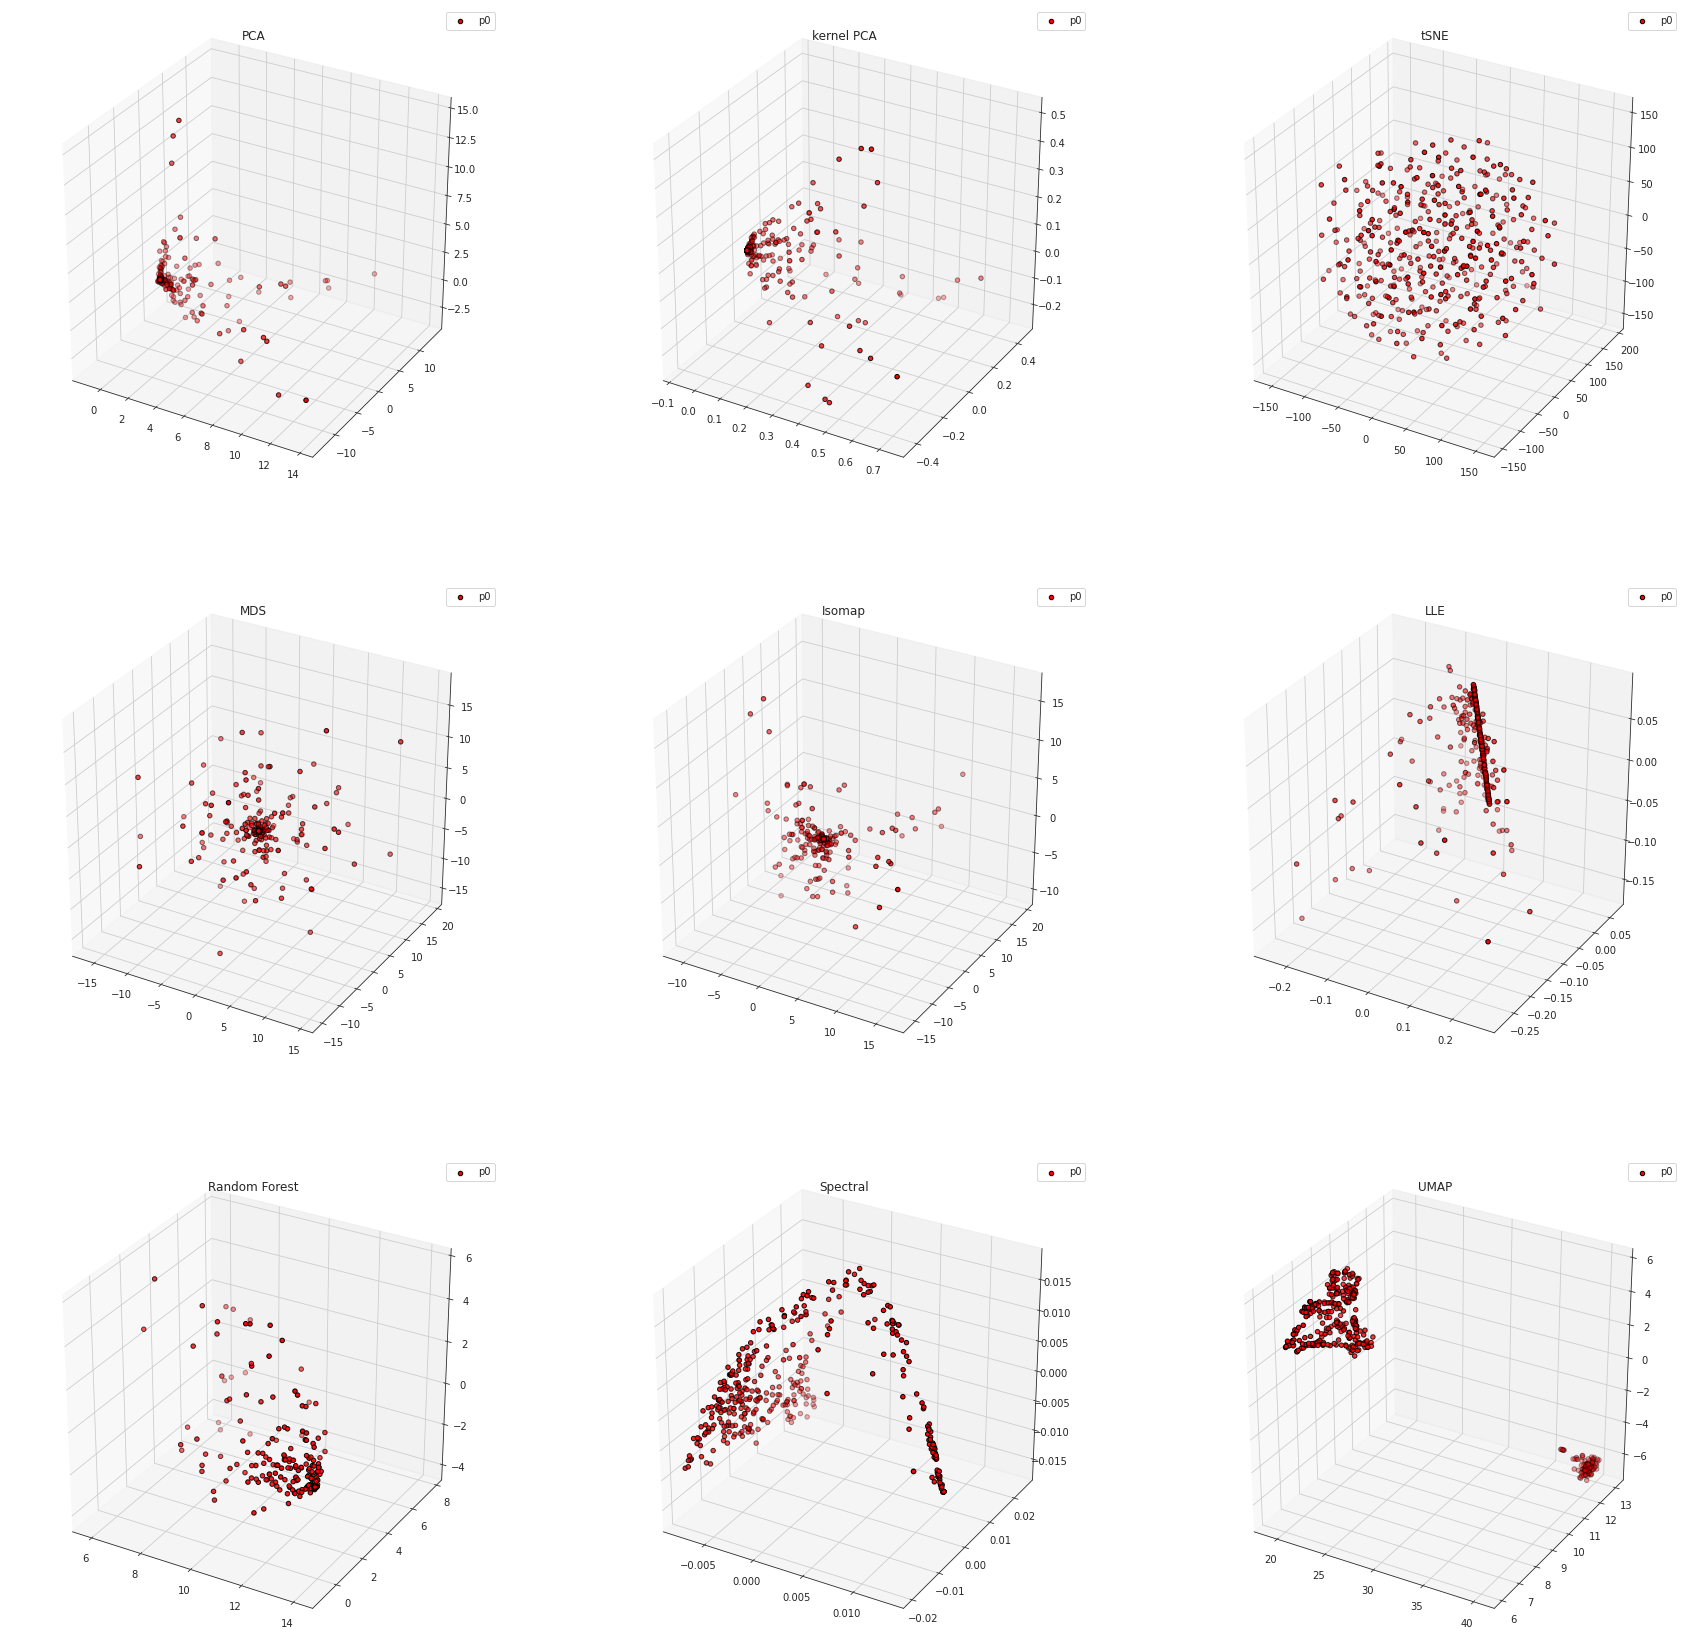

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
import umap

df_g0 = pd.DataFrame(g_all[env0].T)
df_g0["cell_type"] = "g0"
df_p0 = pd.DataFrame(p_all[env0].T)
df_p0["cell_type"] = "p0"

df_g1 = pd.DataFrame(g_all[env1].T)
df_g1["cell_type"] = "g1"
df_p1 = pd.DataFrame(p_all[env1].T)
df_p1["cell_type"] = "p1"

df_g0_p0 = df_g0.append(df_p0)

df_g1_p1 = df_g1.append(df_p1)

df_g0_g1 = df_g0.append(df_g1)

df_p0_p1 = df_p0.append(df_p1)

df_g_p = df_g0_g1.append(df_p0_p1)
df_g_p["cell_type"] = df_g_p["cell_type"].str.get(0)

# 2D Plots
# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

# Variables to change for the plots
######################
name = "p0"
plot_name = "_initial_world_n_actions=10"
df = eval("df_"+name)
legend = name.split("_")
######################

variables = list(df.columns[:-1])
x = df.loc[:, variables].values
y = df.loc[:,["cell_type"]].values
X_normalized = StandardScaler().fit_transform(x)


# reds = y[:,0] == legend[0]
# greens = y[:,0] == legend[1]

rows = 3
cols = 3

fig = plt.figure(figsize=(30,30))
# axs = plt.figure(figsize=(24,24)).subplots(rows,cols)
# Dimensionality reduction techniques

# 1.PCA
pca = PCA()
X_pca = pca.fit_transform(X_normalized)
explained_variance = pca.explained_variance_ratio_
print("Explained variance 3 first PCs",explained_variance[:3])
plt.subplot(rows,cols,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="red",s=20, edgecolor="k")
plt.title("PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")
plt.legend(legend)
# ----------------------------------------------------------------------

# 2.kernel rbf PCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(x)
plt.subplot(rows,cols,2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c="red",s=20, edgecolor="k")
plt.title("Projection by KPCA with rbf kernel")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.legend(legend)
# ----------------------------------------------------------------------

# 3.tSNE
X_tsne = TSNE(n_components=3).fit_transform(x)
plt.subplot(rows,cols,3)
plt.scatter(X_tsne[:, 0], X_kpca[:, 1], c="red",s=20, edgecolor="k")
plt.title("tSNE")
plt.xlabel("1st tsne feature")
plt.ylabel("2nd tsne feature")
plt.legend(legend)
# ----------------------------------------------------------------------

# 4.MDS
mds = MDS(n_components=3)
X_mds = mds.fit_transform(X_normalized)
plt.subplot(rows,cols,4)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c="red",s=20, edgecolor="k")
plt.title("MDS")
plt.xlabel("1st MDS feature")
plt.ylabel("2nd MDS feature")
plt.legend(legend)

# ----------------------------------------------------------------------
n_neighbors = 30
# 5. Isomap
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=3).fit_transform(X_normalized)
plt.subplot(rows,cols,5)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c="red",s=20, edgecolor="k")
plt.title("Isomap")
plt.xlabel("1st Isomap feature")
plt.ylabel("2nd Isomap feature")
plt.legend(legend)

# ----------------------------------------------------------------------
# 6. LLE
lle = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=3,
                                      method='standard')
X_LLE = lle.fit_transform(X_normalized)
plt.subplot(rows,cols,6)
plt.scatter(X_LLE[:, 0], X_LLE[:, 1], c="red",s=20, edgecolor="k")
plt.title("Locally Linear Embedding")
plt.xlabel("1st LLE feature")
plt.ylabel("2nd LLE feature")
plt.legend(legend)
# ----------------------------------------------------------------------
# 7. Random Trees

random_forest = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
X_transformed = random_forest.fit_transform(X_normalized)
pca = decomposition.TruncatedSVD(n_components=3)
X_reduced = pca.fit_transform(X_transformed)
plt.subplot(rows,cols,7)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c="red",s=20, edgecolor="k")
plt.title("Random forest")
plt.xlabel("1st Random forest embedding feature")
plt.ylabel("2nd Random forest embedding feature")
plt.legend(legend)

# ----------------------------------------------------------------------
# 8. Spectral 
spectral = manifold.SpectralEmbedding(n_components=3, random_state=0,
                                      eigen_solver="arpack")

X_spectral = spectral.fit_transform(X_normalized)
plt.subplot(rows,cols,8)
plt.scatter(X_spectral[:, 0], X_spectral[:, 1], c="red",s=20, edgecolor="k")
plt.title("Spectral embedding")
plt.xlabel("1st Spectral embedding feature")
plt.ylabel("2nd Spectral embedding feature")
plt.legend(legend)

# ----------------------------------------------------------------------
# 9. UMAP
umap = umap.UMAP(n_components=3)
X_UMAP = umap.fit_transform(X_normalized)
plt.subplot(rows,cols,9)
plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c="red",s=20, edgecolor="k")
plt.title("UMAP")
plt.xlabel("1st UMAP feature")
plt.ylabel("2nd UMAP feature")
plt.legend(legend)
# ----------------------------------------------------------------------

fig.savefig(name+plot_name+"_2d_viz_dim_reduction.pdf")
plt.show()
# 3D Plots


# ----------------------------------------------------------------------
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(rows, cols, 1, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:, 2], c="red",s=20, edgecolor="k")
plt.title("PCA")
ax.legend(legend)

ax = fig.add_subplot(rows, cols, 2, projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1],X_kpca[:, 2], c="red",s=20, edgecolor="k")
plt.title("kernel PCA")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 3, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:, 2], c="red",s=20, edgecolor="k")
plt.title("tSNE")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 4, projection='3d')
ax.scatter(X_mds[:, 0], X_mds[:, 1],X_mds[:, 2], c="red",s=20, edgecolor="k")
plt.title("MDS")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 5, projection='3d')
ax.scatter(X_iso[:, 0], X_iso[:, 1],X_iso[:, 2], c="red",s=20, edgecolor="k")
plt.title("Isomap")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 6, projection='3d')
ax.scatter(X_LLE[:, 0], X_LLE[:, 1],X_LLE[:, 2], c="red",s=20, edgecolor="k")
plt.title("LLE")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 7, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1],X_reduced[:, 2], c="red",s=20, edgecolor="k")
plt.title("Random Forest")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 8, projection='3d')
ax.scatter(X_spectral[:, 0], X_spectral[:, 1],X_spectral[:, 2], c="red",s=20, edgecolor="k")
plt.title("Spectral")
ax.legend(legend)

ax = fig.add_subplot(rows,cols, 9, projection='3d')
ax.scatter(X_UMAP[:, 0], X_UMAP[:, 1],X_UMAP[:, 2], c="red",s=20, edgecolor="k")
plt.title("UMAP")
ax.legend(legend)

fig.savefig(name+plot_name+"_3d_viz_dim_reduction.pdf")

plt.show()

In [ ]:



import matplotlib.pyplot as plt
import networkx as nx

import networkx as nx
import random

    
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)



In [ ]:


def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

#estimated_autocorrelation(cell_)

In [ ]:


def family_relation_types(s1, s2):
    # find level:
    level_1 = np.floor(np.log2(s1 + 1))
    level_2 = np.floor(np.log2(s2 + 1))

    diff = s2 - s1
    diff_level = level_2 - level_1

    rel_type = 'new'

    if s2 == np.floor((s1 - 1) / 2):
        rel_type = 'parent'
    elif s2 == 2 * (s1 + 1) - 1:
        rel_type = 'child 1'
    elif s2 == 2 * (s1 + 1):
        rel_type = 'child 2'
    elif diff_level == 0:
        if s1 % 2 == 1:

            if diff == 1:
                rel_type = 'sibling'
            if np.abs(diff) == 2:
                rel_type = 'cousin 1'
            if diff == 3:
                rel_type = 'cousin 2'
            if diff == -1:
                rel_type = 'cousin 2'

        if s1 % 2 == 0:

            if diff == -1:
                rel_type = 'sibling'
            if diff == 1:
                rel_type = 'cousin 1'
            if np.abs(diff) == 2:
                rel_type = 'cousin 2'
            if diff == -3:
                rel_type = 'cousin 1'
    elif diff_level == -2:
        rel_type = 'grand parent'
    elif diff_level == -1:
        rel_type = 'uncle'
    elif diff_level == 1:
        if s1 % 2 == 0:
            if s2 == 2 * ((s1 - 1) + 1) - 1:
                rel_type = 'nephew 1'
            elif s2 == 2 * ((s1 - 1) + 1):
                rel_type = 'nephew 2'
        else:
            if s2 == 2 * ((s1 + 1) + 1) - 1:
                rel_type = 'nephew 1'
            elif s2 == 2 * ((s1 + 1) + 1):
                rel_type = 'nephew 2'
    else:
        rel_type = 'new'

    rels = ['parent', 'child 1', 'child 2', 'sibling', 'grand parent', 'uncle', 'nephew 1', 'nephew 2',
            'cousin 1', 'cousin 2']

    return rel_type


## Get relations


In [ ]:
### Define which cells to use and vmin,vmax


env_use = env0
cells = g_all[env_use]
vmin = g_lim[0] if cells.shape[1]==120  else p_lim[0]
vmax = g_lim[1] if cells.shape[1]==120  else p_lim[1]

### Define relations :
relations = []
   


for l in range(cells.shape[0]):
  relation = [None] * cells.shape[0]
  for i in range(cells.shape[0]):
    if i!=l :
      relation[i] = family_relation_types(l,i)
    else:
      relation[i] = 'self'
  relations.append(relation)

In [ ]:
# for i in range(cells.shape[0]):
#   print((relations[i]))

In [ ]:


# Get relations for all cells and all positions
all_new_rel_cells = []
all_parent_rel_cells = []
all_child1_rel_cells = []
all_child2_rel_cells = []
all_sibling_rel_cells = []
all_grandparent_rel_cells = []
all_uncle_rel_cells = []
all_nephew1_rel_cells = []
all_nephew2_rel_cells = []
all_cousin1_rel_cells = []
all_cousin2_rel_cells = []
all_self_rel_cells = []


# Summary by cell by position (max relation at each position for each cell)
all_overall_rel_cells = []
all_overall_rel_cells_numeric = []

# Global summary by cell (max average relation across all position within a cell) 
# ( we sum values for all relations in each position and divide by number of times a relation is present)
all_max_cells = []




for j in range(cells.shape[1]):
  cell = cells[:,j]
  new_rel_cells = []
  parent_rel_cells = []
  child1_rel_cells = []
  child2_rel_cells = []
  sibling_rel_cells = []
  grandparent_rel_cells = []
  uncle_rel_cells = []
  nephew1_rel_cells = []
  nephew2_rel_cells = []
  cousin1_rel_cells = []
  cousin2_rel_cells = []
  self_rel_cells = []
  overall_rel_cells = []
  overall_rel_cells_numeric = []
  for l in range(len(cell)):
    new = parent = child1 = child2 = sibling = grandparent = uncle = nephew1 = nephew2 = cousin1 = cousin2 = self = 0

    tmp = [i for i, e in enumerate(relations[l]) if e == 'new']
    new = np.sum(cell[tmp])/len(tmp)
    new_rel_cells.append(new)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'parent']
    parent = np.sum(cell[tmp])/len(tmp)
    parent_rel_cells.append(parent)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'child 1']
    child1 = np.sum(cell[tmp])/len(tmp)
    child1_rel_cells.append(child1)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'child 2']
    child2 = np.sum(cell[tmp])/len(tmp)
    child2_rel_cells.append(child2)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'sibling']
    sibling = np.sum(cell[tmp])/len(tmp)
    sibling_rel_cells.append(sibling)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'grand parent']
    grandparent = np.sum(cell[tmp])/len(tmp)
    grandparent_rel_cells.append(grandparent)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'uncle']
    uncle = np.sum(cell[tmp])/len(tmp)
    uncle_rel_cells.append(uncle)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'nephew 1']
    nephew1 = np.sum(cell[tmp])/len(tmp)
    nephew1_rel_cells.append(nephew1)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'nephew 2']
    nephew2 = np.sum(cell[tmp])/len(tmp)
    nephew2_rel_cells.append(nephew2)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'cousin 1']
    cousin1 = np.sum(cell[tmp])/len(tmp)
    cousin1_rel_cells.append(cousin1)

    tmp = [i for i, e in enumerate(relations[l]) if e == 'cousin 2']
    cousin2 = np.sum(cell[tmp])/len(tmp)
    cousin2_rel_cells.append(cousin2)
    

    tmp = [i for i, e in enumerate(relations[l]) if e == 'self']
    self = np.sum(cell[tmp])/len(tmp)
    self_rel_cells.append(self)
    
    var = {new:"new",self:"self",parent:"parent",child1:"child 1",child2:"child 2",sibling:"sibling",grandparent:"grand parent",
           uncle:"uncle",nephew1:"nephew 1",nephew2:"nephew 2",cousin1:"cousin1",cousin2:"cousin 2"}
    overall_rel_cells.append(var.get(max(var)))




    var_numeric = {new:"blue",self:"green",parent:"red",child1:"orange",child2:"yellow",sibling:"purple",grandparent:"pink",
                   uncle:"black",nephew1:"lightskyblue",nephew2:"steelblue",cousin1:"slategray",cousin2:"slategrey"}
    overall_rel_cells_numeric.append(var_numeric.get(max(var_numeric)))

  all_new_rel_cells.append(new_rel_cells)
  all_parent_rel_cells.append(parent_rel_cells)
  all_child1_rel_cells.append(child1_rel_cells)
  all_child2_rel_cells.append(child2_rel_cells)
  all_sibling_rel_cells.append(sibling_rel_cells)
  all_grandparent_rel_cells.append(grandparent_rel_cells)
  all_uncle_rel_cells.append(uncle_rel_cells)
  all_nephew1_rel_cells.append(nephew1_rel_cells)
  all_nephew2_rel_cells.append(nephew2_rel_cells)
  all_cousin1_rel_cells.append(cousin1_rel_cells)
  all_cousin2_rel_cells.append(cousin2_rel_cells)
  all_self_rel_cells.append(self_rel_cells)

  all_overall_rel_cells.append(overall_rel_cells)
  all_overall_rel_cells_numeric.append(overall_rel_cells_numeric)
  

  var_cell = {np.nansum(new_rel_cells):"new_rel_cells",np.nansum(parent_rel_cells):"parent_rel_cells",np.nansum(child1_rel_cells):"child1_rel_cells",
       np.nansum(child2_rel_cells):"child2_rel_cells",np.nansum(sibling_rel_cells):"sibling_rel_cells",np.nansum(grandparent_rel_cells):"grandparent_rel_cells",
       np.nansum(uncle_rel_cells):"uncle_rel_cells",np.nansum(nephew1_rel_cells):"nephew1_rel_cells",np.nansum(nephew2_rel_cells):"nephew2_rel_cells",
       np.nansum(cousin1_rel_cells):"cousin1_rel_cells",np.nansum(cousin2_rel_cells):"cousin2_rel_cells",np.nansum(self_rel_cells):"self_rel_cells"}

  # var_cell = {np.nansum(new_rel_cells):"new_rel_cells",np.nansum(parent_rel_cells):"parent_rel_cells",np.nansum(child1_rel_cells):"child1_rel_cells",
  #      np.nansum(child2_rel_cells):"child2_rel_cells",np.nansum(self_rel_cells):"self_rel_cells"}

  all_max_cells.append(var_cell.get(max(var_cell))) 


from collections import Counter
Counter(all_max_cells)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in double_scalars


Counter({'child1_rel_cells': 2,
         'child2_rel_cells': 3,
         'cousin1_rel_cells': 20,
         'cousin2_rel_cells': 12,
         'grandparent_rel_cells': 29,
         'nephew1_rel_cells': 7,
         'nephew2_rel_cells': 15,
         'new_rel_cells': 19,
         'parent_rel_cells': 9,
         'self_rel_cells': 2,
         'uncle_rel_cells': 2})

In [ ]:
 name_cells = "p1"
 name_world_action = "small_world_n_actions=3.pdf"
 
 ### Plots


f = plt.figure(figsize=(60, 80 if cells.shape[1]==120  else 180))
count_cell = 0
for i in range(cells.shape[1]):
  ax = plt.subplot(int(cells.shape[1]/10), 10, i + 1)
  G=nx.Graph()
  for j in range(2**(params['widths'][env_use])-1):  
    G.add_edges_from([(j,2*j+1),(j,2*j+2)])
  pos = hierarchy_pos(G,0)    
  nx.draw(G, pos=pos, with_labels=False,node_color=all_overall_rel_cells_numeric[i],edge_color="white")
  
plt.show()
f.savefig(name_cells+"_node_coded_by_relations_"+name_world_action)
plt.close("all")




f = plt.figure(figsize=(60, 80))
count_cell = 0
for i in range(cells.shape[1]):

  if(all_max_cells[i]=="self_rel_cells" or all_max_cells[i]=="new_rel_cells" ):
    ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
    G=nx.Graph()
    for j in range(2**(params['widths'][env_use])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    
    nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
    count_cell += 1
plt.show()
f.savefig(name_cells+"_rel_self_new_"+name_world_action)
plt.close("all")

f = plt.figure(figsize=(60, 80))
count_cell = 0
for i in range(cells.shape[1]):

  if(all_max_cells[i]=="parent_rel_cells" ):
    ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
    G=nx.Graph()
    for j in range(2**(params['widths'][env_use])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    
    nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
    count_cell += 1
plt.show()
f.savefig(name_cells+"_rel_parent_"+name_world_action)
plt.close("all")



f = plt.figure(figsize=(60, 80))
count_cell = 0
for i in range(cells.shape[1]):

  if(all_max_cells[i]=="child1_rel_cells" ):
    ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
    G=nx.Graph()
    for j in range(2**(params['widths'][env_use])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    
    nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
    count_cell += 1
plt.show()
f.savefig(name_cells+"_rel_child1_"+name_world_action)
plt.close("all")


f = plt.figure(figsize=(60, 80))
count_cell = 0
for i in range(cells.shape[1]):

  if(all_max_cells[i]=="child2_rel_cells" ):
    ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
    G=nx.Graph()
    for j in range(2**(params['widths'][env_use])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
    count_cell += 1
plt.show()
f.savefig(name_cells+"_rel_child2_"+name_world_action)
plt.close("all")

# f = plt.figure(figsize=(60, 80))
# count_cell = 0
# for i in range(cells.shape[1]):

#   if(all_max_cells[i]=="sibling_rel_cells" ):
#     ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
#     G=nx.Graph()
#     for j in range(2**(params['widths'][env_use])-1):  
#       G.add_edges_from([(j,2*j+1),(j,2*j+2)])
#     pos = hierarchy_pos(G,0)    
#     nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
#     count_cell += 1
# plt.show()
# f.savefig(name_cells+"_rel_sibling_"+name_world_action)
# plt.close("all")

# f = plt.figure(figsize=(60, 80))
# count_cell = 0
# for i in range(cells.shape[1]):

#   if(all_max_cells[i]=="grandparent_rel_cells" ):
#     ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
#     G=nx.Graph()
#     for j in range(2**(params['widths'][env_use])-1):  
#       G.add_edges_from([(j,2*j+1),(j,2*j+2)])
#     pos = hierarchy_pos(G,0)    
#     nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
#     count_cell += 1
# plt.show()
# f.savefig(name_cells+"_rel_grandparent_"+name_world_action)
# plt.close("all")

# f = plt.figure(figsize=(60, 80))
# count_cell = 0
# for i in range(cells.shape[1]):

#   if(all_max_cells[i]=="uncle_rel_cells" ):
#     ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
#     G=nx.Graph()
#     for j in range(2**(params['widths'][env_use])-1):  
#       G.add_edges_from([(j,2*j+1),(j,2*j+2)])
#     pos = hierarchy_pos(G,0)    
#     nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
#     count_cell += 1
# plt.show()
# f.savefig(name_cells+"_rel_uncle_"+name_world_action)
# plt.close("all")

# f = plt.figure(figsize=(60, 80))
# count_cell = 0
# for i in range(cells.shape[1]):

#   if(all_max_cells[i]=="nephew1_rel_cells" ):
#     ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
#     G=nx.Graph()
#     for j in range(2**(params['widths'][env_use])-1):  
#       G.add_edges_from([(j,2*j+1),(j,2*j+2)])
#     pos = hierarchy_pos(G,0)    
#     nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
#     count_cell += 1
# plt.show()
# f.savefig(name_cells+"_rel_nephew1_"+name_world_action)
# plt.close("all")

# f = plt.figure(figsize=(60, 80))
# count_cell = 0
# for i in range(cells.shape[1]):

#   if(all_max_cells[i]=="nephew2_rel_cells" ):
#     ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
#     G=nx.Graph()
#     for j in range(2**(params['widths'][env_use])-1):  
#       G.add_edges_from([(j,2*j+1),(j,2*j+2)])
#     pos = hierarchy_pos(G,0)    
#     nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
#     count_cell += 1
# plt.show()
# f.savefig(name_cells+"_rel_nephew2_"+name_world_action)
# plt.close("all")

# f = plt.figure(figsize=(60, 80))
# count_cell = 0
# for i in range(cells.shape[1]):

#   if(all_max_cells[i]=="cousin1_rel_cells" ):
#     ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
#     G=nx.Graph()
#     for j in range(2**(params['widths'][env_use])-1):  
#       G.add_edges_from([(j,2*j+1),(j,2*j+2)])
#     pos = hierarchy_pos(G,0)    
#     nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
#     count_cell += 1
# plt.show()
# f.savefig(name_cells+"_rel_cousin1_"+name_world_action)
# plt.close("all")

# f = plt.figure(figsize=(60, 80))
# count_cell = 0
# for i in range(cells.shape[1]):

#   if(all_max_cells[i]=="cousin2_rel_cells" ):
#     ax = plt.subplot(int(cells.shape[1]/10), 10, count_cell + 1)
#     G=nx.Graph()
#     for j in range(2**(params['widths'][env_use])-1):  
#       G.add_edges_from([(j,2*j+1),(j,2*j+2)])
#     pos = hierarchy_pos(G,0)    
#     nx.draw(G, pos=pos, with_labels=False,node_color=cells[:,i],edge_color="white",cmap=plt.cm.jet,vmin=vmin[i], vmax=vmax[i])
#     count_cell += 1
# plt.show()
# f.savefig(name_cells+"_rel_cousin2_"+name_world_action)
# plt.close("all")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
parent = []
child1 = []
child2 = []
import math
cell=g_all[env0][:,0]
levels = round(math.log(len(cell),2))

for l in range(1,levels) :
  2**(l-1)

In [ ]:


cell_
#lag "parent"
#autocorr5(cell_[[0,1,3,7,15]],lags=range(2))
autocorr5(np.array([1,2,5,8,25,18,37,38,59,60]),lags=range(3))
#np.correlate(cell_[[0,1,3,7,15,29]], cell_[[0,1,3,7,15,29]], mode = 'full')[-n:]

array([1.        , 0.67421574, 0.38965631])

In [ ]:

x=cell_
n = len(x)
variance = x.var()
x = x-x.mean()
r = np.correlate(x, x, mode = 'full')[-n:]
r

def autocorr5(x,lags):
    '''numpy.correlate, non partial'''
    mean=x.mean()
    var=np.var(x)
    xp=x-mean
    corr=np.correlate(xp,xp,'full')[len(x)-1:]/var/len(x)

    return corr[:len(lags)]

def autocorr4(x,lags):
    '''fft, don't pad 0s, non partial'''
    mean=x.mean()
    var=np.var(x)
    xp=x-mean

    cf=np.fft.fft(xp)
    sf=cf.conjugate()*cf
    corr=np.fft.ifft(sf).real/var/len(x)

    return corr[:len(lags)]

def autocorr3(x,lags):
    '''fft, pad 0s, non partial'''

    n=len(x)
    # pad 0s to 2n-1
    ext_size=2*n-1
    # nearest power of 2
    fsize=2**np.ceil(np.log2(ext_size)).astype('int')

    xp=x-np.mean(x)
    var=np.var(x)

    # do fft and ifft
    cf=np.fft.fft(xp,fsize)
    sf=cf.conjugate()*cf
    corr=np.fft.ifft(sf).real
    corr=corr/var/n

    return corr[:len(lags)]
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''

    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

def autocorr2(x,lags):
    '''manualy compute, non partial'''

    mean=np.mean(x)
    var=np.var(x)
    xp=x-mean
    corr=[1. if l==0 else np.sum(xp[l:]*xp[:-l])/len(x)/var for l in lags]

    return np.array(corr)


3

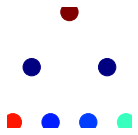

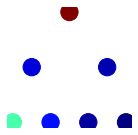

In [ ]:

# square_autocorr_plot(g_all[env0], widths[batch_id[env0]], name='g0_auto', \
#                      hexy=params['world_type'], mult=mult, smoothing=smoothing, cmap=cmap, circle=True)
cell=g_all[env0]
n = np.shape(cell)[1]
wid = np.ceil(np.sqrt(n))

wid = np.ceil(np.sqrt(n))

f = plt.figure(figsize=(29, 29))
n=1
for grid in range(n):
    ax = plt.subplot(wid, wid, grid + 1)
    cell_ = cell[:, grid]

    cell_reshaped = np.reshape(cell_, (1, -1))

    #y_, x_ = np.shape(cell_reshaped)


    def autocorr(x):
      result = np.correlate(x, x, mode='full')
      return result[int(round(result.size/2)):]
    
    #auto = autocorr(cell_)
    def estimated_autocorrelation(x):
      """
      http://stackoverflow.com/q/14297012/190597
      http://en.wikipedia.org/wiki/Autocorrelation#Estimation
      """
      n = len(x)
      variance = x.var()
      x = x-x.mean()
      r = np.correlate(x, x, mode = 'full')[-n:]
      assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
      result = r/(variance*(np.arange(n, 0, -1)))
      return result

    auto = estimated_autocorrelation(cell_)
    auto = np.reshape(auto, (1, -1))
    
    
    G=nx.Graph()
    for j in range(2**(params['widths'][env0])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    nx.draw(G, pos=pos, with_labels=False,node_color=auto,cmap=plt.cm.jet,vmin=auto.min(), vmax=auto.max(),edge_color="white" )
     
    # ax.imshow(auto, cmap=cmap)
    # ax.set_xticks([])
    # ax.set_yticks([])

f = plt.figure(figsize=(29, 29))
n=1
for grid in range(n):
    ax = plt.subplot(wid, wid, grid + 1)
    cell_ = cell[:, grid]

    cell_reshaped = np.reshape(cell_, (1, -1))

    #y_, x_ = np.shape(cell_reshaped)


    def autocorr(x):
      result = np.correlate(x, x, mode='full')
      return result[int(round(result.size/2)):]
    
    auto = autocorr(cell_)
    #auto = estimated_autocorrelation(cell_)
    auto = np.reshape(auto, (1, -1))
    
    
    G=nx.Graph()
    for j in range(2**(params['widths'][env0])-1):  
      G.add_edges_from([(j,2*j+1),(j,2*j+2)])
    pos = hierarchy_pos(G,0)    
    nx.draw(G, pos=pos, with_labels=False,node_color=auto,cmap=plt.cm.jet,vmin=auto.min(), vmax=auto.max(),edge_color="white" )

plt.show()

In [ ]:

auto.shape

(1, 31)

In [ ]:
env0 = 1
env1 = 2